# K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.75)
sns.set_style("white")

import random
np.random.seed(10)

K-Means Clustering is a clustering algorithm that finds the optimal kmeans clustering model by iterating over a range of values and creating a model with the lowest possible silhouette score, as defined in SKlearn [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

Kmeans clustering is a form of clustering that works to seperate samples into a number of equivariant groups while minimizing the sum of the smallest squared deviations that each sample point has from any of the cluster means. Mathematically, the algorithm is trying to create clusters with means that minimize the following quantity:

$$\sum_{i=1}^{N} \underset{\mu_{c}, c \in C}{\text{min}}_{}||x_{i} - \mu_{c}||^{2}$$

where $N$ is the number of samples, $\mu_{c}$ is the mean of cluster $c$, $C$ is the set of all clusters, $x_{i}$ is a sample point, and $|| \cdot ||$ is the Euclidean distance.

## Using KClust on Synthetic Data

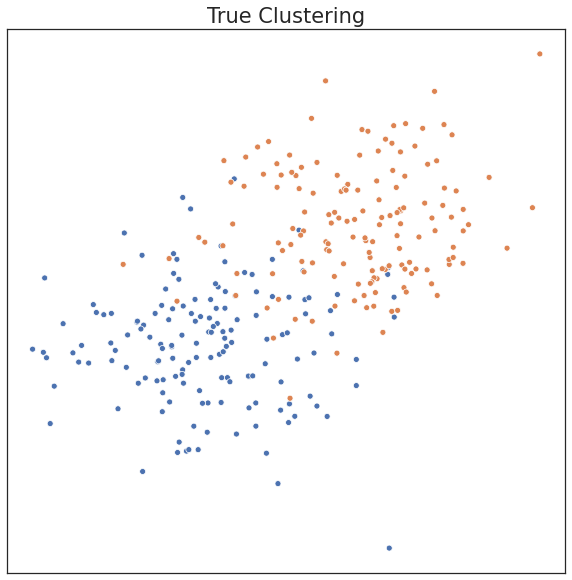

In [2]:
# Synthetic data

# Dim 1
class_1 = np.random.randn(150, 1)
class_2 = 2 + np.random.randn(150, 1)
dim_1 = np.vstack((class_1, class_2))

# Dim 2
class_1 = np.random.randn(150, 1)
class_2 = 2 + np.random.randn(150, 1)
dim_2 = np.vstack((class_1, class_2))

X = np.hstack((dim_1, dim_2))

# Labels
label_1 = np.zeros((150, 1))
label_2 = 1 + label_1

c = np.vstack((label_1, label_2)).reshape(300,)

# Plotting Function for Clustering
def plot(title, c_hat, X):
    plt.figure(figsize=(10, 10))
    n_components = int(np.max(c_hat) + 1)
    palette = sns.color_palette("deep")[:n_components]
    fig = sns.scatterplot(x=X[:,0], y=X[:,1], hue=c_hat, legend=None, palette=palette)
    fig.set(xticks=[], yticks=[], title=title)
    plt.show()

plot('True Clustering', c, X)

In the existing implementation of KMeans clustering in Sklearn, one has to choose parameters of the model, including number of components, apriori. If parameters are input that don't match the data well, clustering performance can suffer. Performance can be measured by ARI, a metric ranging from 0 to 1. An ARI score of 1 indicates the estimated clusters are identical to the true clusters.

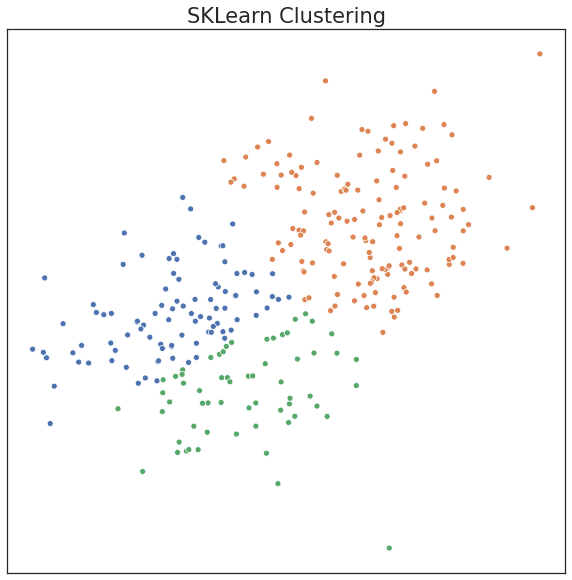

ARI Score for Model: 0.49


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import adjusted_rand_score

# Say user provides inaccurate estimate of number of components
kmeans_ = KMeans(3)
c_hat_kmeans = kmeans_.fit_predict(X)

# Function to remap labels for direct comparison
def remap_labels(y_true, y_pred):

    confusion_mat = confusion_matrix(y_true, y_pred)
    row_inds, col_inds = linear_sum_assignment(confusion_mat, maximize=True)
    label_map = dict(zip(col_inds, row_inds))
    remapped_y_pred = np.vectorize(label_map.get)(y_pred)
    
    return remapped_y_pred

# Remap Predicted labels
c_hat_kmeans = remap_labels(c, c_hat_kmeans)

plot('SKLearn Clustering', c_hat_kmeans, X)

# ARI Score
print("ARI Score for Model: %.2f" % adjusted_rand_score(c, c_hat_kmeans))

Our method expands upon the existing Sklearn framework by allowing the user to automatically find the optimal number of clusters and achieve the best clustering possible. The ideal `n_clusters_` that is less than the max value provided by the user is found.

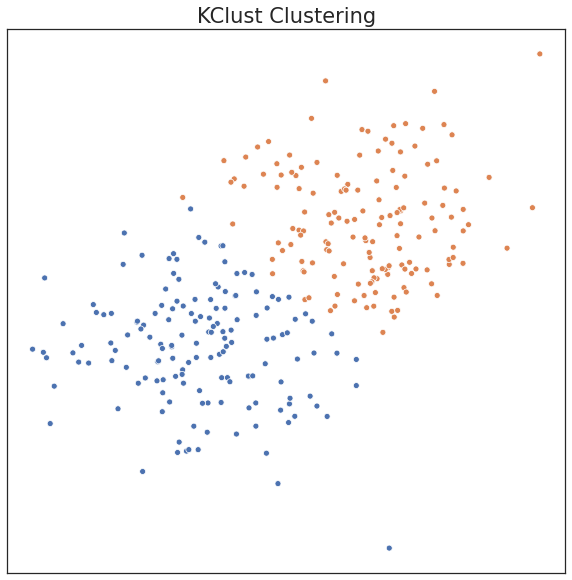

ARI Score for Model: 0.66


In [4]:
from graspologic.cluster.kclust import KMeansCluster

# Fit model
kclust_ = KMeansCluster(max_clusters=10)
c_hat_kclust = kclust_.fit_predict(X)

c_hat_kclust = remap_labels(c, c_hat_kclust)

plot('KClust Clustering', c_hat_kclust, X)

print("ARI Score for Model: %.2f" % adjusted_rand_score(c, c_hat_kclust))